In [1]:
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
weather_df = pd.read_csv('data/region/vietnam/we2.csv', parse_dates=[1], index_col=1)
weather_df.drop(columns='Unnamed: 0', inplace=True)
weather_df.isnull().values.any()

False

In [3]:
def plotAttribute(attribute, df, resample_mode=None):
    fig = plt.figure(figsize=(16, 100))
    fig.suptitle(attribute, fontsize=20, y=0.95)
    
    provinces = df['province'].drop_duplicates().values
    n_provinces = len(provinces)
    
    for i, province in enumerate(provinces):
        province_df = df[df['province'] == province]
        if resample_mode:
            data = province_df[attribute].resample(resample_mode).mean()
        else:
            data = province_df[attribute]
        
        ax = plt.subplot2grid((n_provinces, 1), (i, 0), rowspan=1, colspan=1)
        ax.plot(data)
        ax.set_title(f'{i + 1}. {province}', fontsize=16)
   
        for year in range(2021, 2026):
            ax.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95], pad=2)
    plt.subplots_adjust(hspace=0.8)


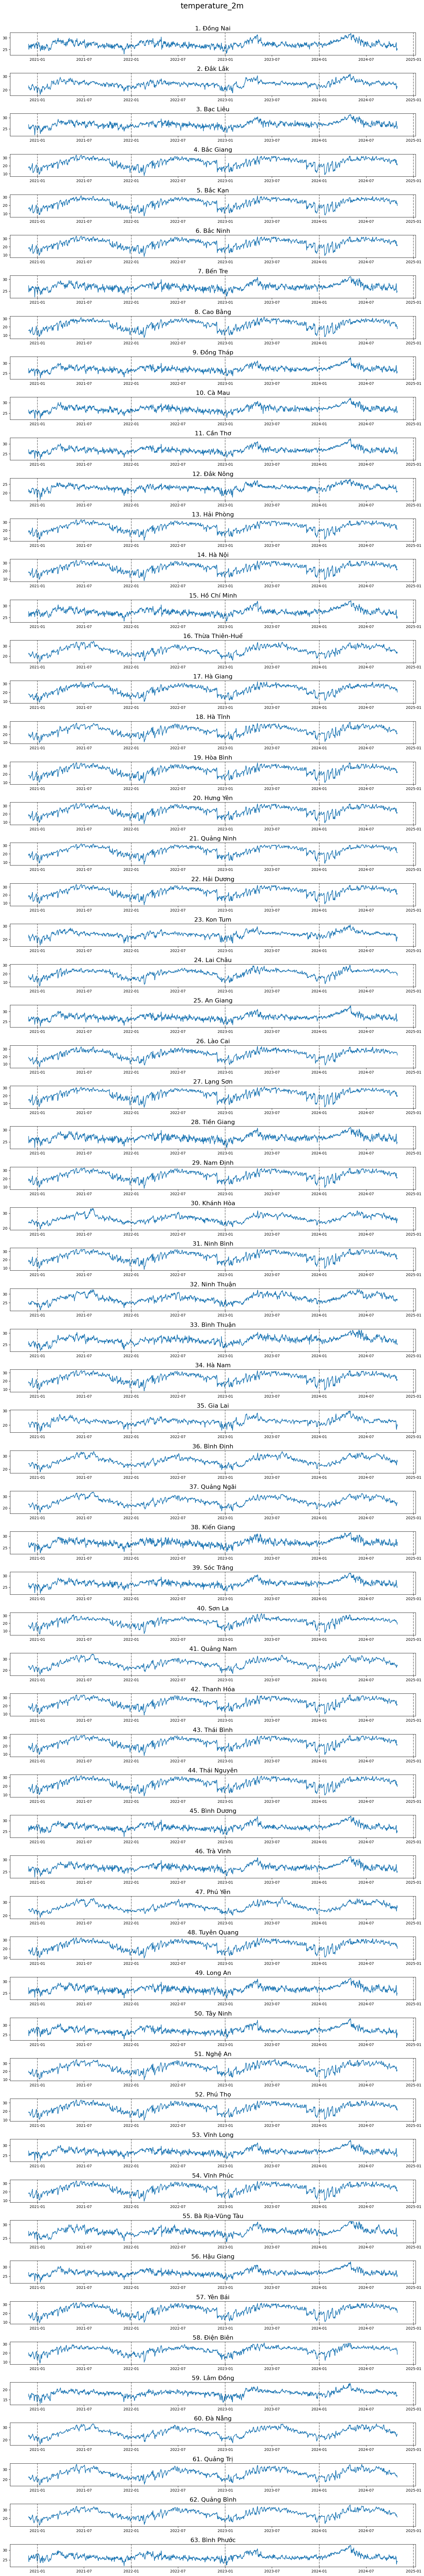

In [4]:
plotAttribute('temperature_2m', weather_df, 'D')

In [5]:
def plotACFandPACF(attribute, df, acf_lags = 25, pacf_lags = 25, resample_mode = None):
    provinces = df['province'].drop_duplicates().values
    
    for i, province in enumerate(provinces):
        province_df = df[df['province'] == province]
        if resample_mode:
            data = province_df[attribute].resample(resample_mode).mean()
        else:
            data = province_df[attribute]

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3), dpi= 80)
        fig.suptitle(f'{i}. {province}: {attribute}')
        plot_acf(data, ax=ax1, lags=acf_lags)
        plot_pacf(data, ax=ax2, lags=pacf_lags)

        plt.show()

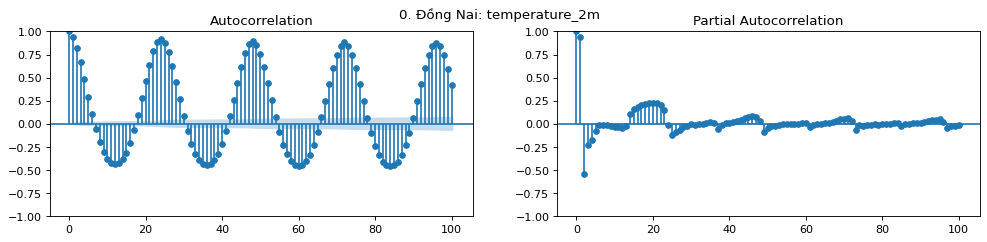

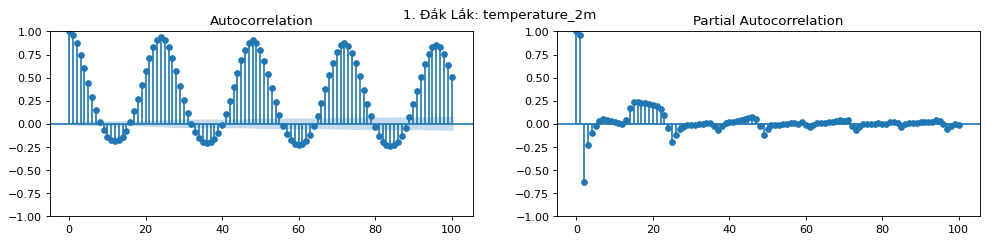

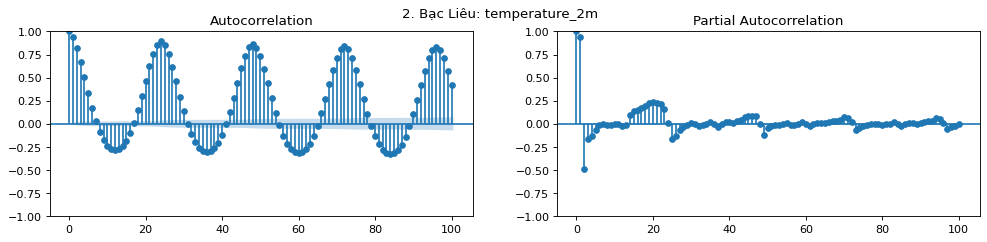

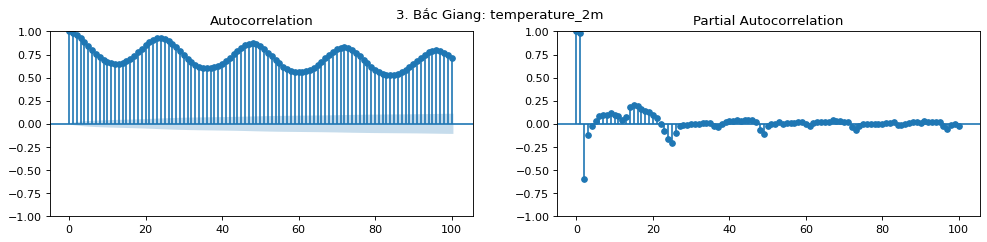

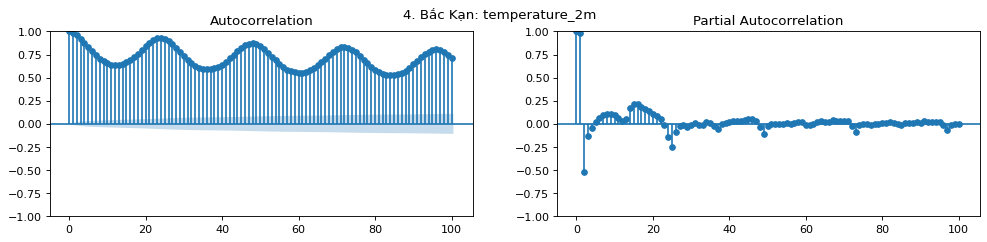

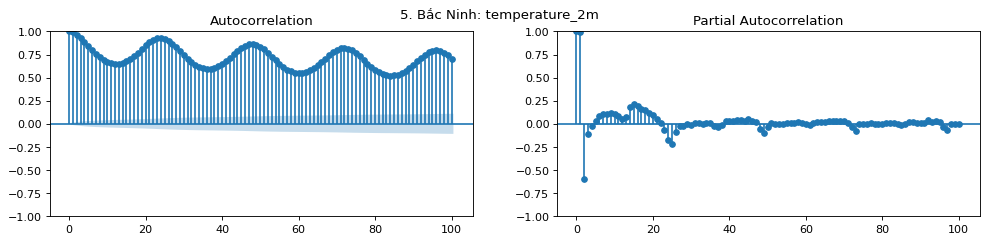

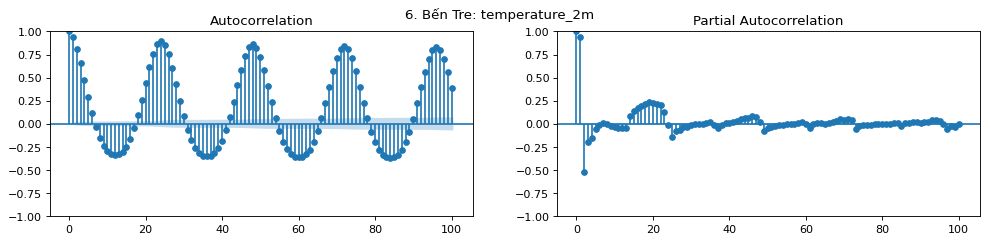

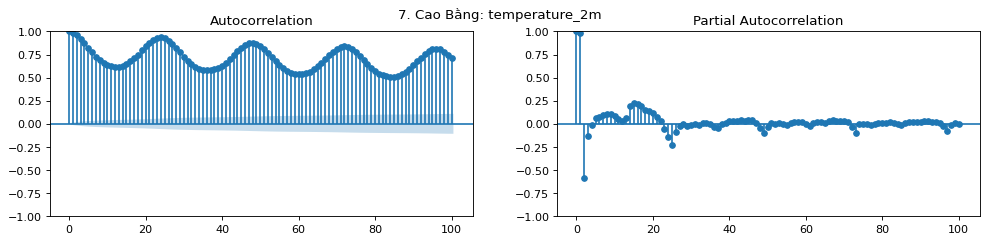

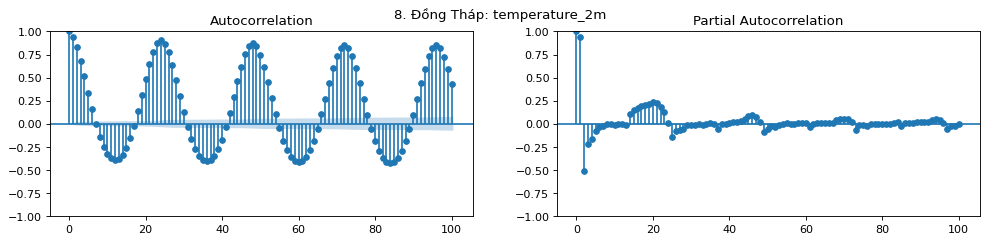

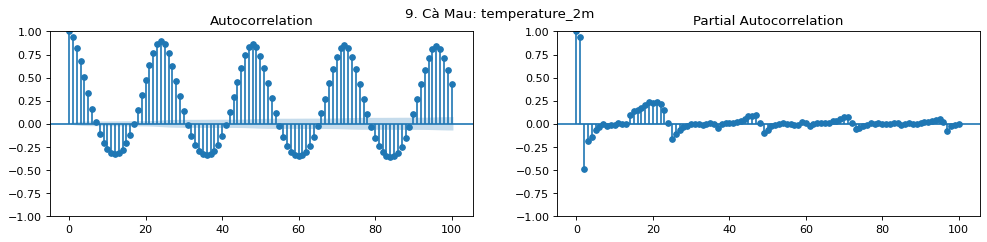

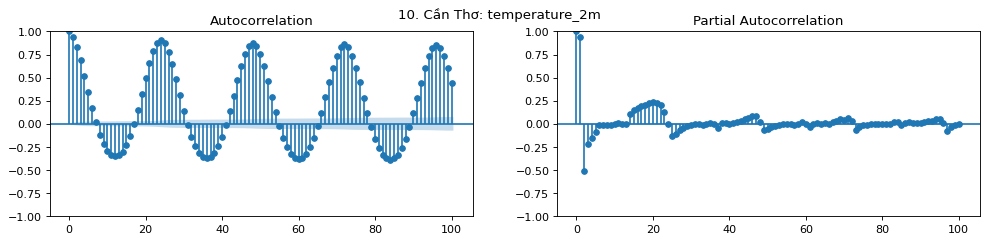

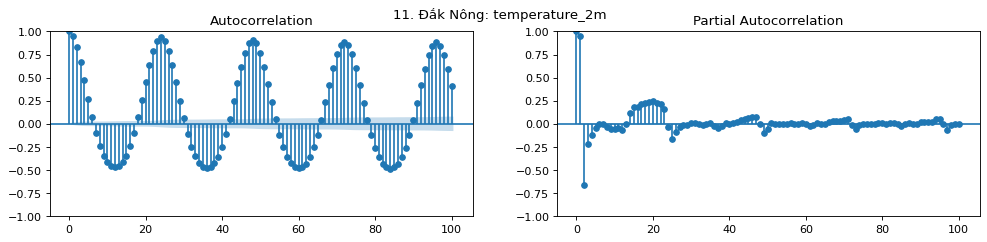

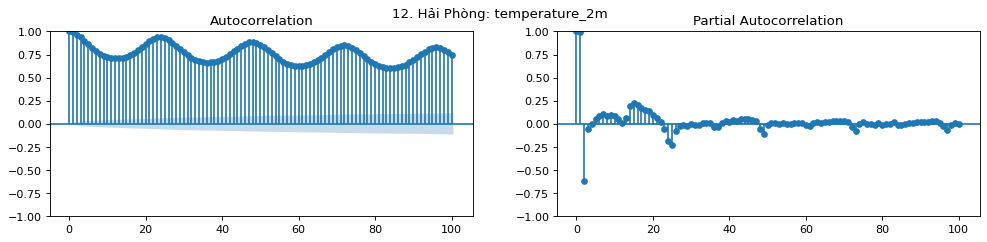

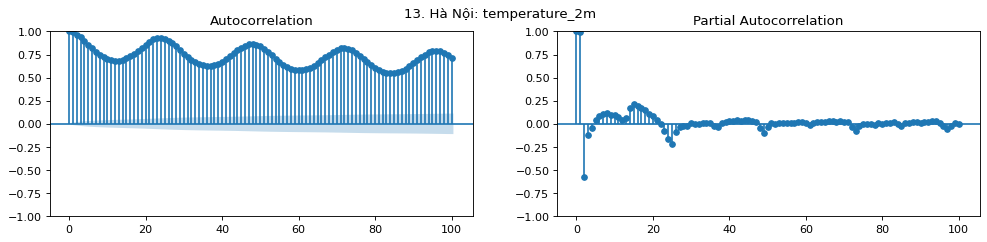

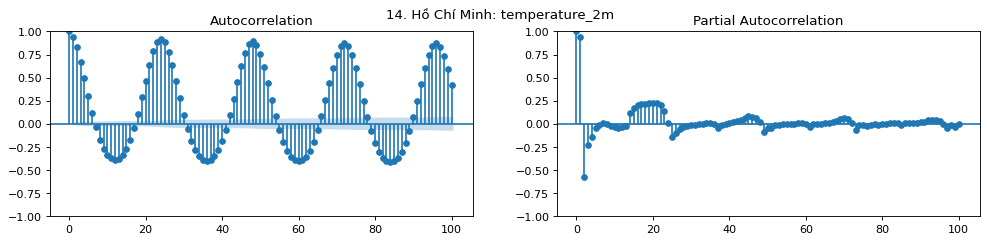

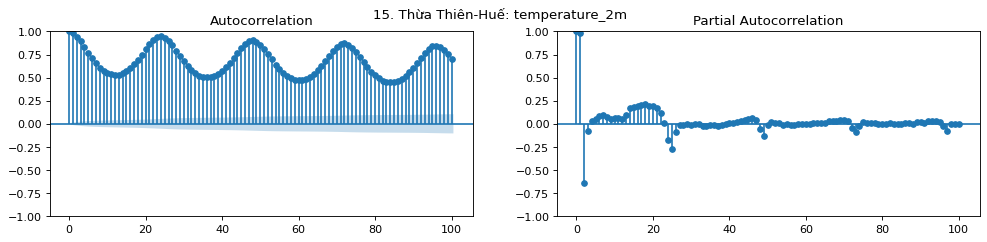

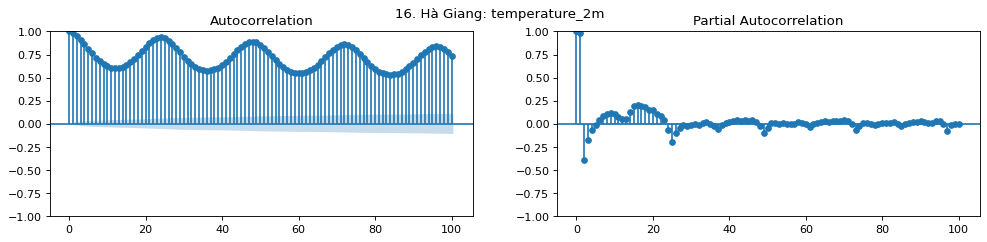

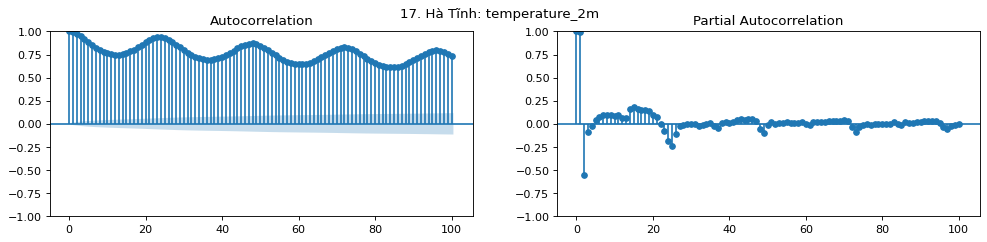

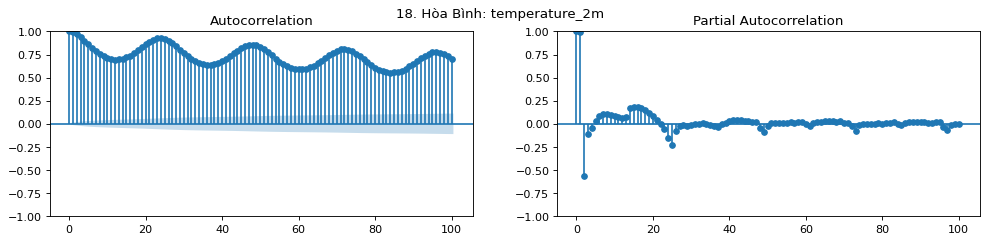

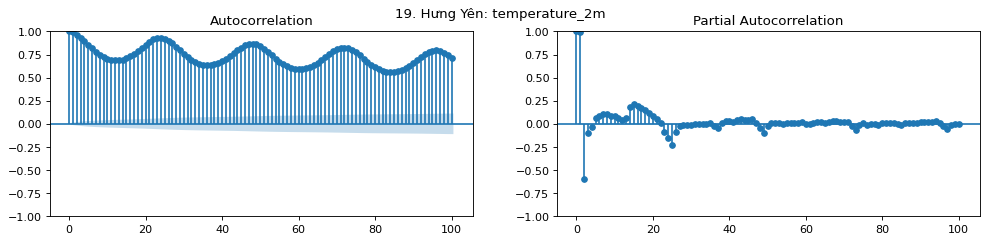

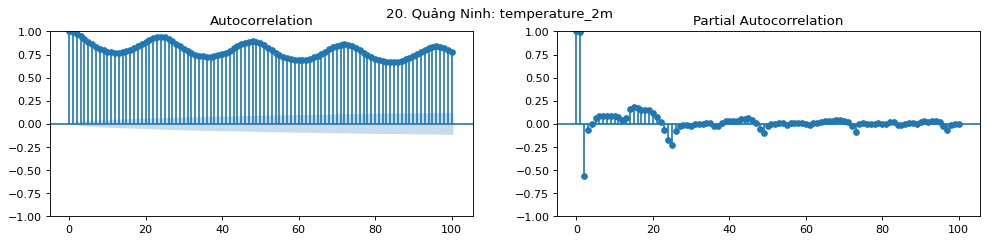

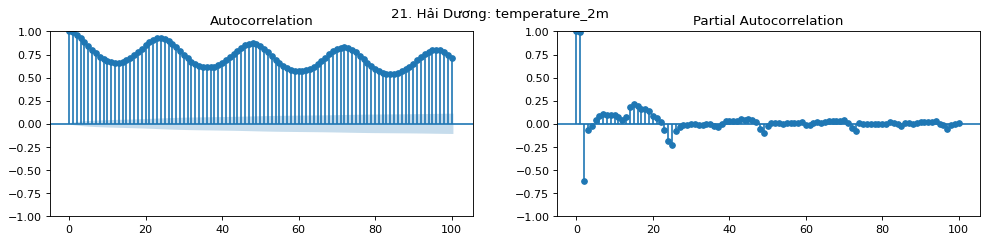

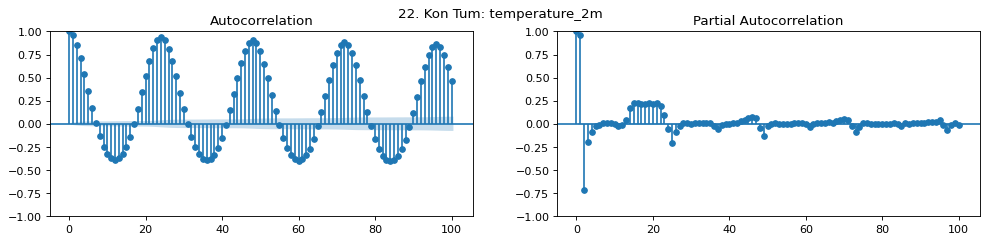

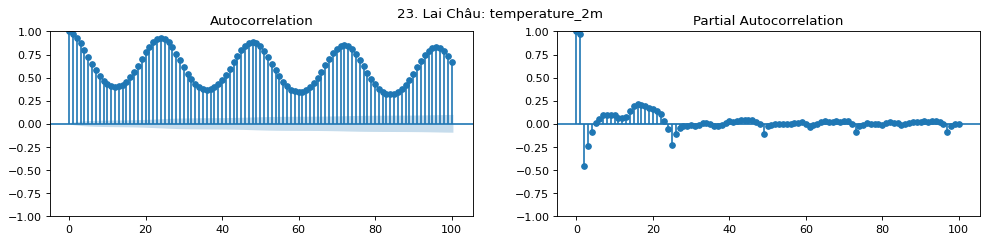

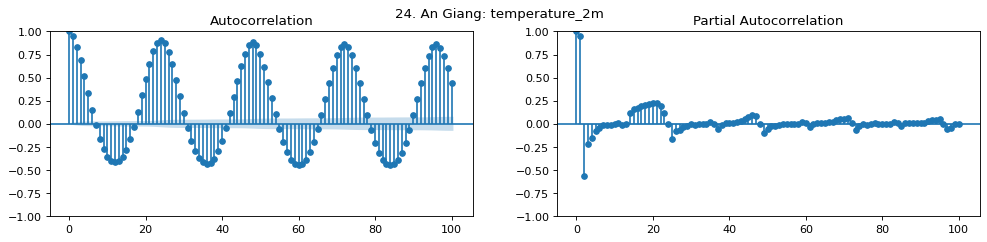

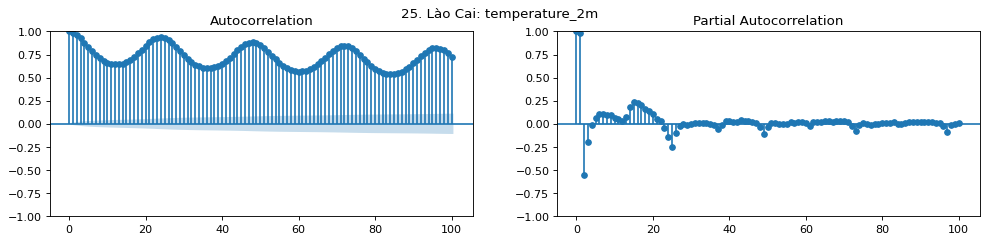

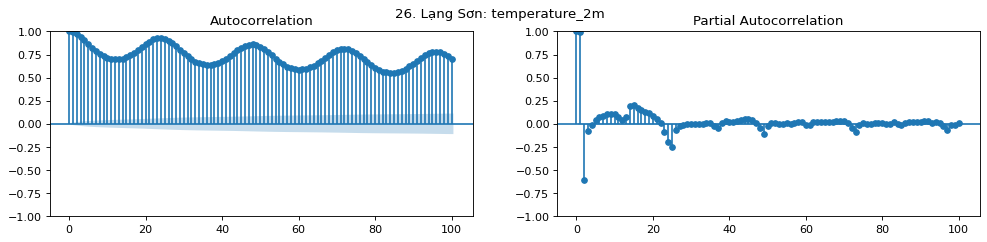

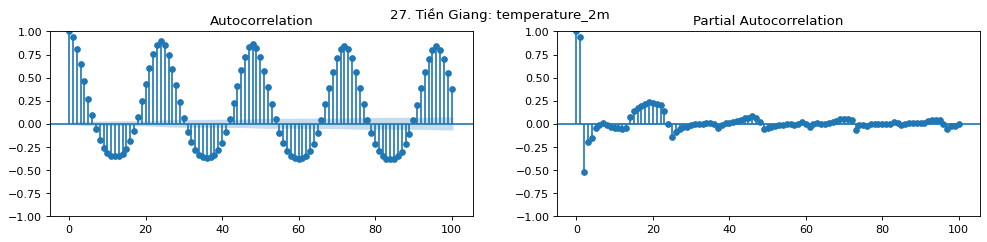

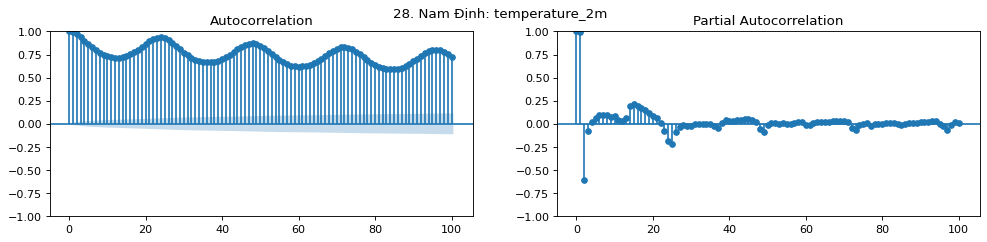

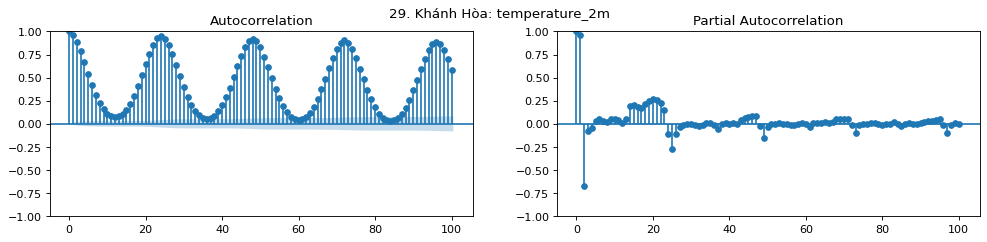

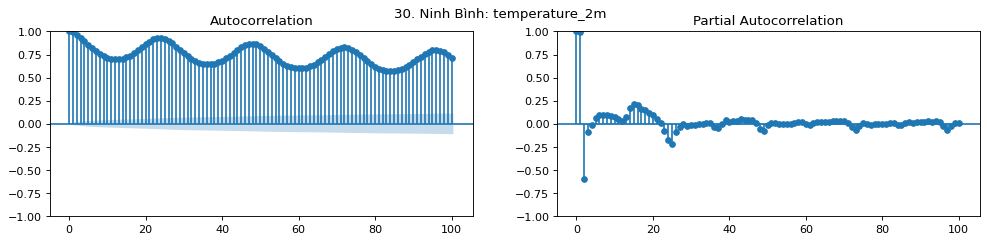

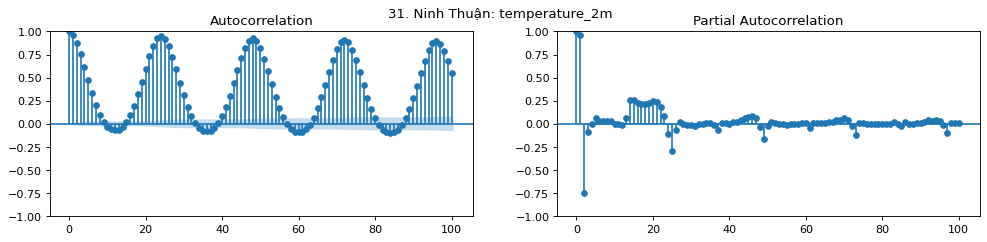

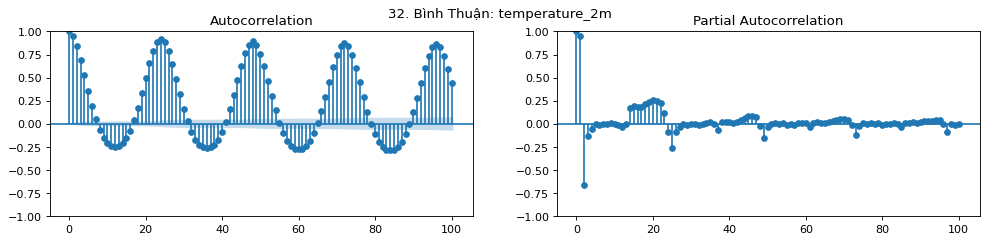

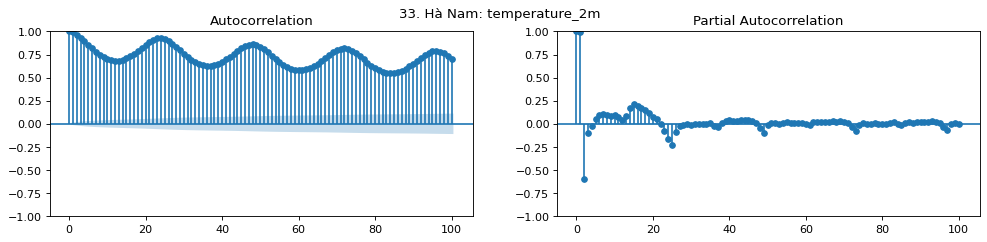

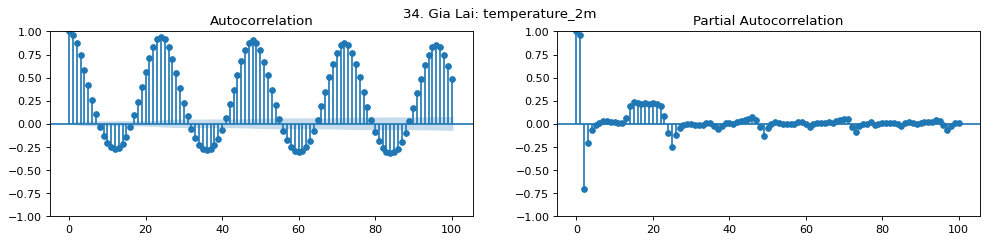

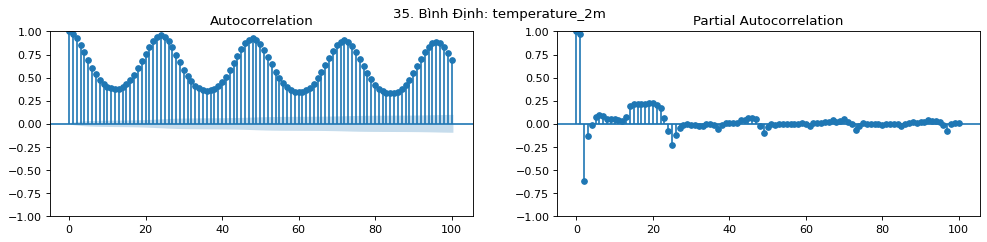

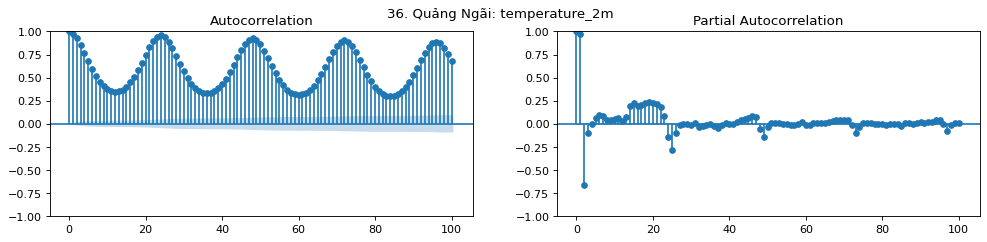

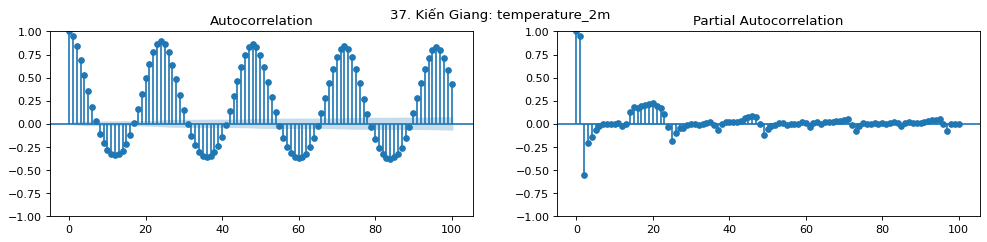

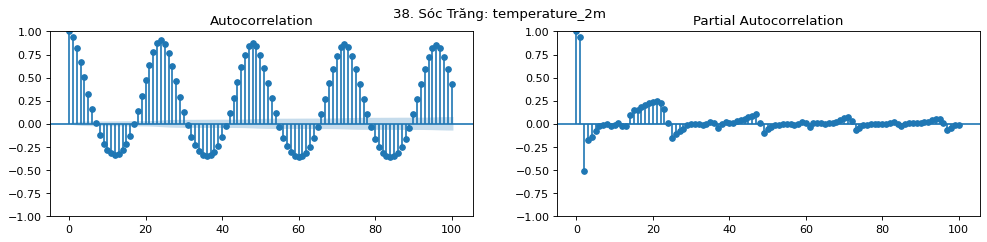

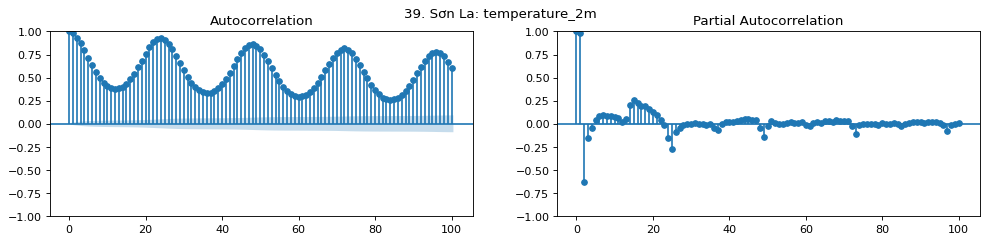

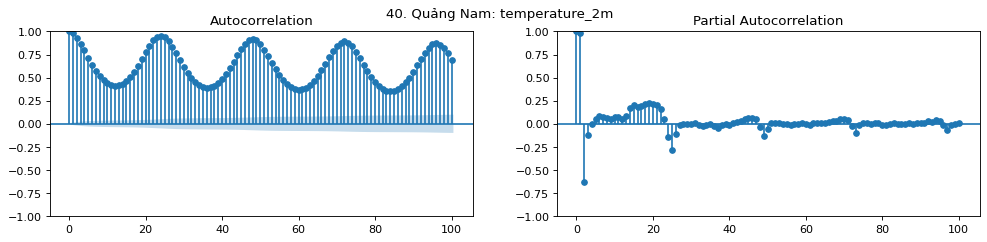

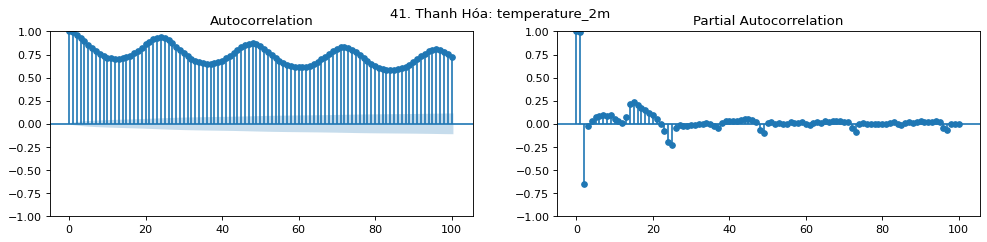

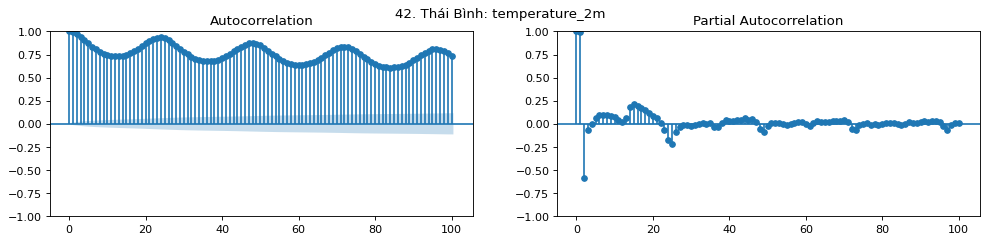

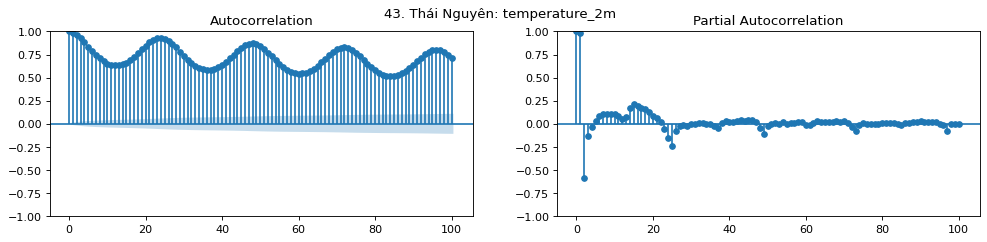

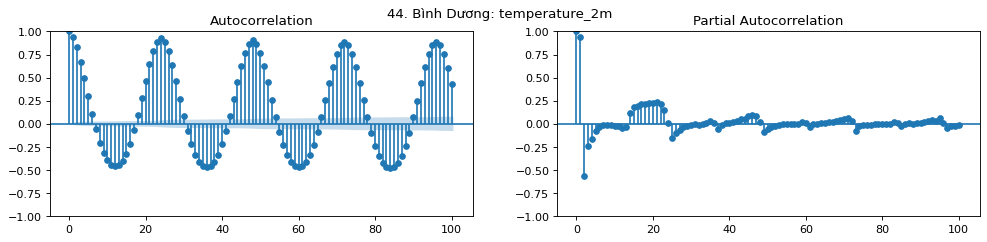

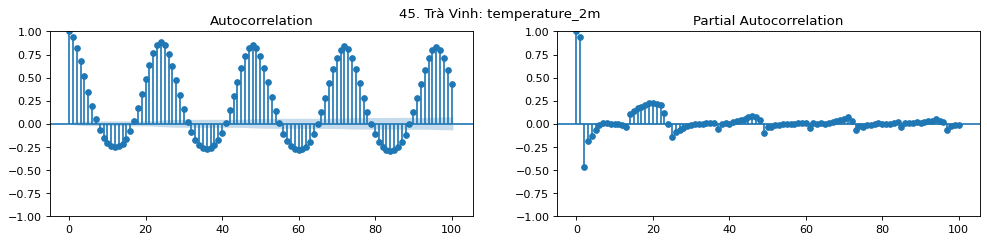

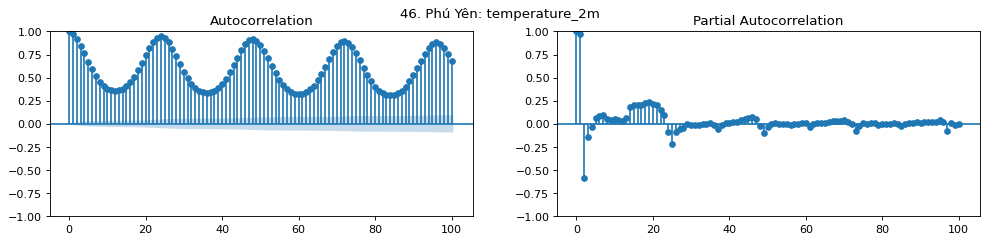

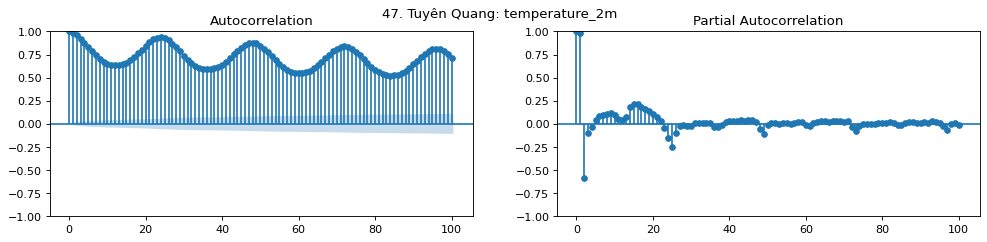

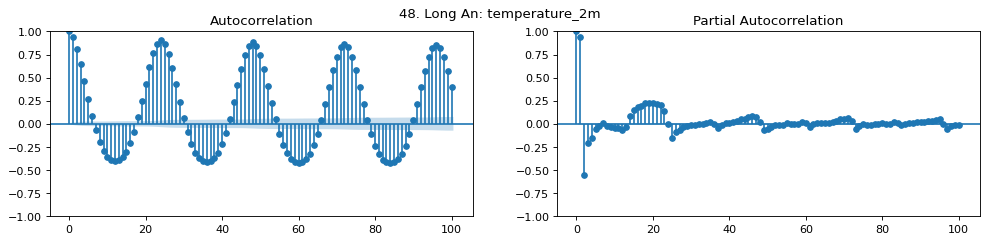

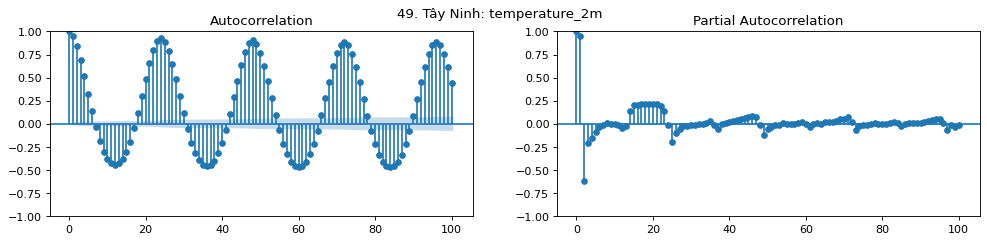

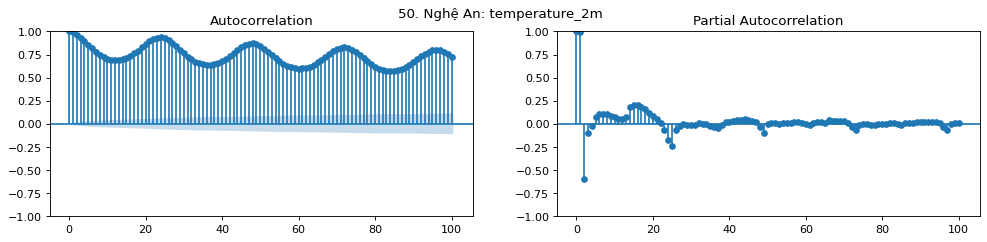

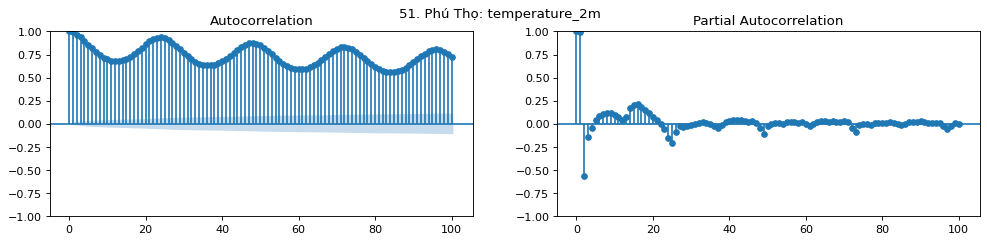

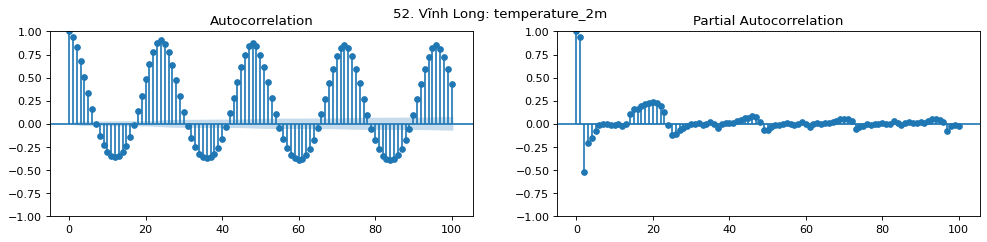

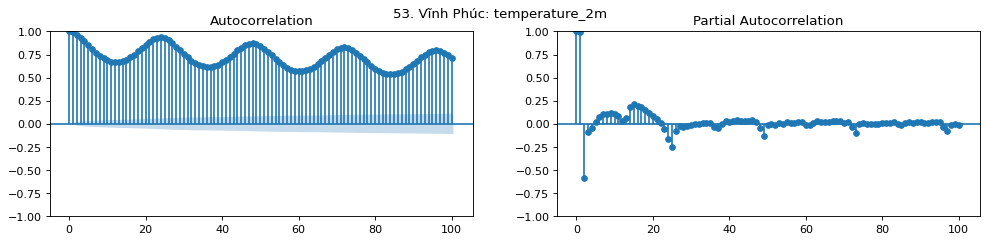

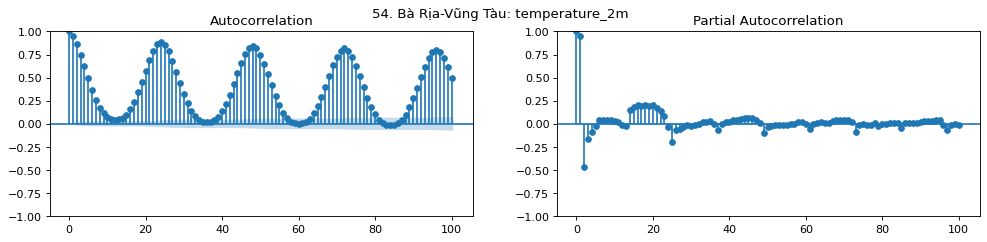

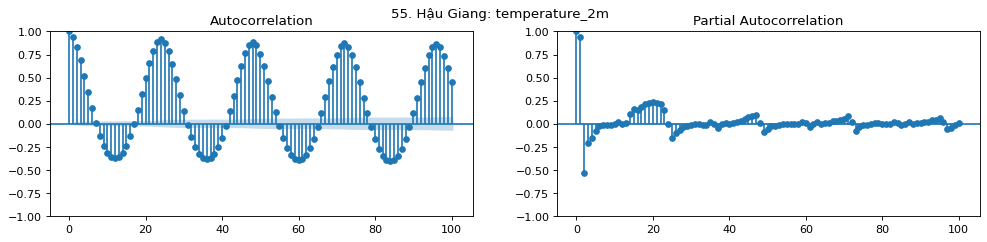

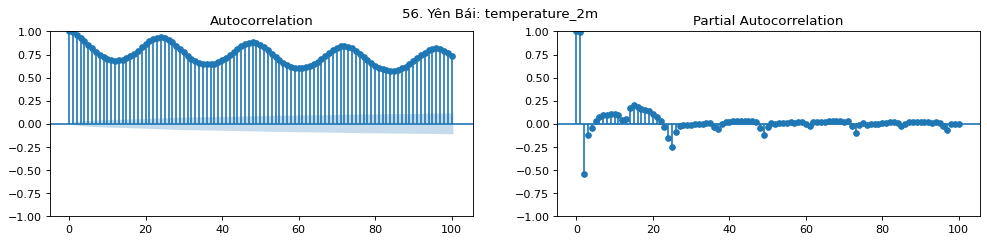

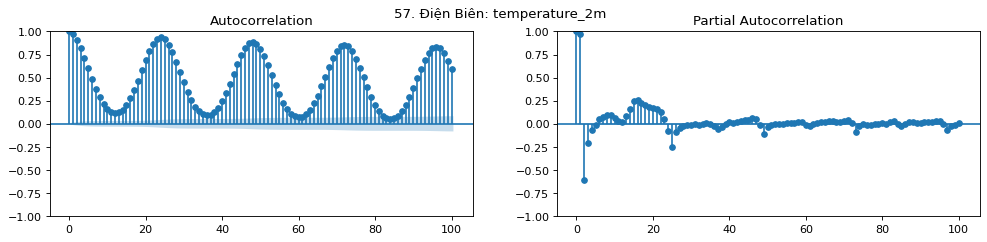

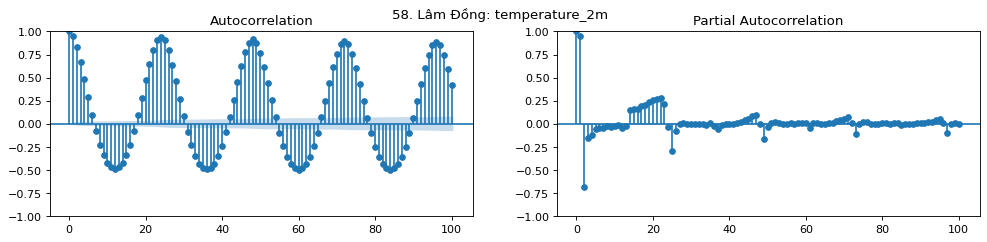

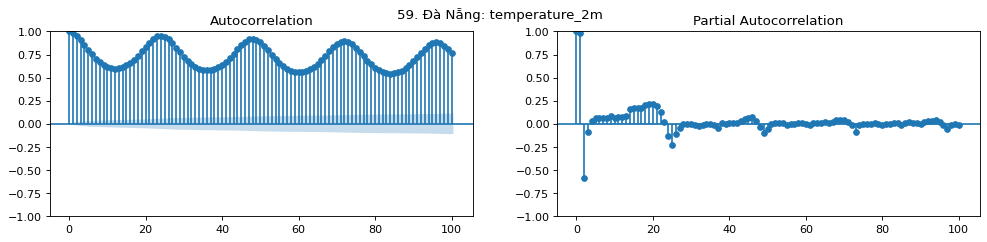

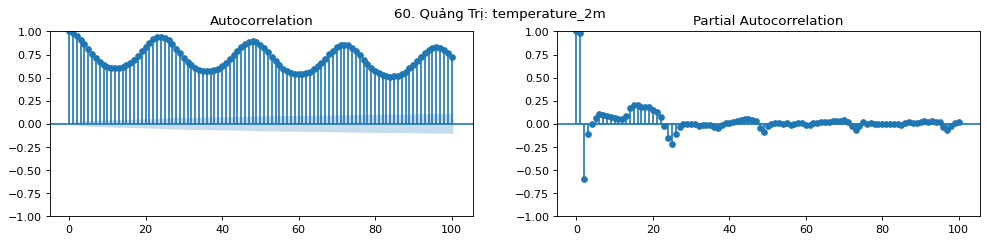

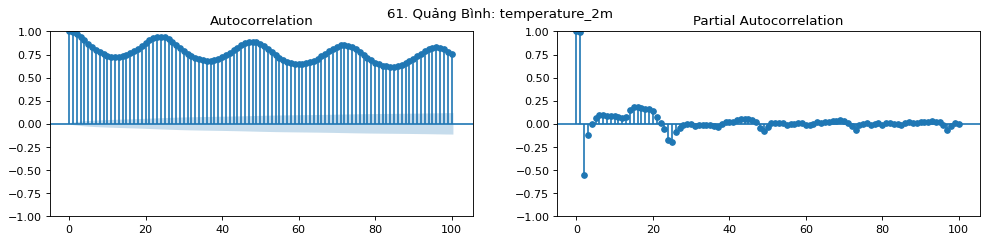

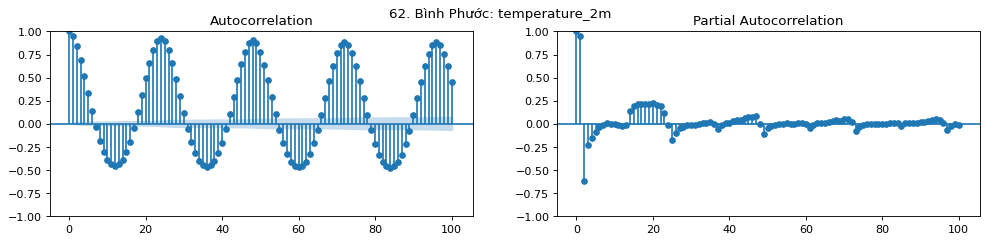

In [18]:
plotACFandPACF('temperature_2m', weather_df, 100, 100)

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def perform_adf_test(attribute, df, resample_mode = None):
    non_stationary_cnt = 0
    provinces = df['province'].drop_duplicates().values
    print(f'ADF test for {attribute}')
    for i, province in enumerate(provinces):
        province_df = df[df['province'] == province]
        if resample_mode:
            data = province_df[attribute].resample(resample_mode).mean()
        else:
            data = province_df[attribute]
        result = adfuller(data)
        if result[1] >= 0.05:
            print(f'{i+1}. {province} is NOT stationary')
            non_stationary_cnt += 1
        else:
            print(f'{i+1}. {province} is stationary')
    print(f'Number of non-stationary: {non_stationary_cnt}')


Hourly shows all attributes are stationary

Daily shows some attributes are non-stationary (temp, dew_point)

Monthly shows even stronger prove of non-stationary (all are non-stationary)

In [9]:
perform_adf_test('temperature_2m', weather_df)

ADF test for temperature_2m
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationary

In [10]:
perform_adf_test('relative_humidity_2m', weather_df)

ADF test for relative_humidity_2m
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stat

In [11]:
perform_adf_test('dew_point_2m', weather_df)

ADF test for dew_point_2m
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationary
3

In [12]:
perform_adf_test('rain', weather_df)

ADF test for rain
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationary
37. Quảng

In [13]:
perform_adf_test('surface_pressure', weather_df)

ADF test for surface_pressure
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationa

In [14]:
perform_adf_test('cloud_cover', weather_df)

ADF test for cloud_cover
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationary
37

In [15]:
perform_adf_test('wind_speed_10m', weather_df)

ADF test for wind_speed_10m
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is stationary

In [16]:
perform_adf_test('wind_direction_10m', weather_df)


ADF test for wind_direction_10m
1. Đồng Nai is stationary
2. Đắk Lắk is stationary
3. Bạc Liêu is stationary
4. Bắc Giang is stationary
5. Bắc Kạn is stationary
6. Bắc Ninh is stationary
7. Bến Tre is stationary
8. Cao Bằng is stationary
9. Đồng Tháp is stationary
10. Cà Mau is stationary
11. Cần Thơ is stationary
12. Đắk Nông is stationary
13. Hải Phòng is stationary
14. Hà Nội is stationary
15. Hồ Chí Minh is stationary
16. Thừa Thiên-Huế is stationary
17. Hà Giang is stationary
18. Hà Tĩnh is stationary
19. Hòa Bình is stationary
20. Hưng Yên is stationary
21. Quảng Ninh is stationary
22. Hải Dương is stationary
23. Kon Tum is stationary
24. Lai Châu is stationary
25. An Giang is stationary
26. Lào Cai is stationary
27. Lạng Sơn is stationary
28. Tiền Giang is stationary
29. Nam Định is stationary
30. Khánh Hòa is stationary
31. Ninh Bình is stationary
32. Ninh Thuận is stationary
33. Bình Thuận is stationary
34. Hà Nam is stationary
35. Gia Lai is stationary
36. Bình Định is statio